In [1]:
import argparse
import os
import numpy as np
import scipy.stats
from scipy.stats import wilcoxon
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
from operator import itemgetter

plt.style.use('ggplot')

from msmarco_compare import compute_metrics_from_files 

In [2]:
def load_metrics(file):
    metrics = {}
    with open(file, 'r') as f:
        for line in f:
            metric, qid, score = line.split('\t')
            metric = metric.strip()
            qid = qid.strip()
            score = score.strip()
            if qid == 'all':
                continue
            if metric not in metrics:
                metrics[metric] = {}
            metrics[metric][qid] = float(score)

    return metrics

In [3]:
def plot(all_results, ymin=-1, ymax=1, output_path="."):
    fig, ax = plt.subplots(1, 1, figsize=(16, 3))
    all_results.sort(key = itemgetter(1), reverse=True)
    x = [_x+0.5 for _x in range(len(all_results))]
    y = [float(ele[1]) for ele in all_results]
    ax.bar(x, y, width=0.6, align='edge')
    ax.set_xticks(x)
    ax.set_xticklabels([int(ele[0]) for ele in all_results], {'fontsize': 4}, rotation='vertical')
    ax.grid(True)
    ax.set_title("Per-topic analysis on {}".format(metric))
    ax.set_xlabel('Topics')
    ax.set_ylabel('{} Diff'.format(metric))
    ax.set_ylim(ymin, ymax)
    plt.show()
    #output_fn = os.path.join(output_path, 'per_query_{}.pdf'.format(metric))
    #plt.savefig(output_fn, bbox_inches='tight', format='pdf')

In [4]:
import pandas as pd

#path = "G:/python/anserini/src/main/resources/topics-and-qrels/"
path = "C:/Users/Loes/Documents/M1/IR/anserini/src/main/resources/topics-and-qrels/"
topics_file = "topics.dl19-doc.txt"

topics = pd.read_csv(path+topics_file,sep="\t",names=["ID","Question"])
topics["ID"]= topics["ID"].astype(str)

topics.head()

,ID,Question
0,156493,do goldfish grow
1,1110199,what is wifi vs bluetooth
2,1063750,why did the us volunterilay enter ww1
3,130510,definition declaratory judgment
4,489204,right pelvic pain causes


1037798	0.0	0.0	0.0
104861	0.0091	0.0077	-0.0014
1063750	0.0076	0.0076	0.0
1103812	0.0292	0.0133	-0.0159
1106007	0.0041	0.0041	0.0
1110199	0.0711	0.0711	0.0
1112341	0.0056	0.0056	0.0
1113437	0.0067	0.0067	0.0
1114646	0.1019	0.1019	0.0
1114819	0.0158	0.0158	0.0
1115776	0.6092	0.6092	0.0
1117099	0.011	0.0125	0.0015
1121402	0.1818	0.1818	0.0
1124210	0.0362	0.0362	0.0
1129237	0.0614	0.0526	-0.0088
1132213	0.3366	0.3366	0.0
1133167	0.0503	0.0503	0.0
130510	0.2063	0.2143	0.008
131843	0.24	0.24	0.0
146187	0.177	0.177	0.0
148538	0.0257	0.0257	0.0
156493	0.0662	0.0589	-0.0073
182539	0.1626	0.1476	-0.015
183378	0.0241	0.024	-0.0001
19335	0.1016	0.0978	-0.0038
207786	0.085	0.085	0.0
264014	0.0565	0.0565	0.0
287683	0.3278	0.3278	0.0
359349	0.0546	0.0546	0.0
405717	0.1124	0.1124	0.0
443396	0.0	0.0	0.0
451602	0.0059	0.0059	0.0
47923	0.0071	0.0073	0.0002
489204	0.0029	0.003	0.0001
490595	0.1293	0.1227	-0.0066
527433	0.0683	0.0735	0.0052
573724	0.14	0.1103	-0.0297
833860	0.0348	0.0348	0.0
855410	1.0	1

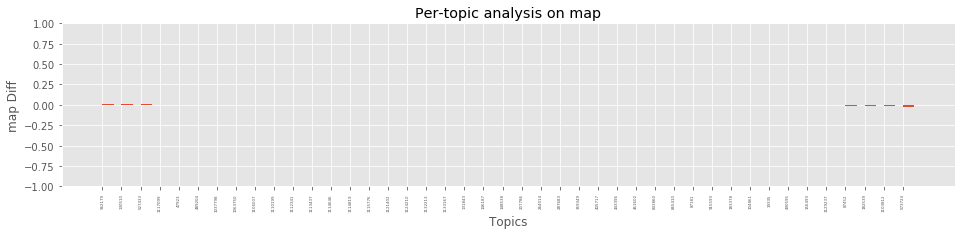

metric: map
        ID                             Question
12  962179  when was the salvation army founded


In [5]:
# parser = argparse.ArgumentParser()
# parser.add_argument("--base", type=str, help='base run', required=True)
# parser.add_argument("--comparison", type=str, help='comparison run', required=True)
# parser.add_argument("--qrels", type=str, help='qrels', required=True)
# parser.add_argument("--metric", type=str, help='metric', default="map")
# parser.add_argument("--msmarco", action='store_true', default=False, help='whether to use masarco eval script')
# parser.add_argument("--ymin", type=float, help='min value of the y axis', default=-1)
# parser.add_argument("--ymax", type=float, help='max value of the y axis', default=1)

#args = parser.parse_args()

# base = "runs/bm25.txt"
# comp = "runs/bm25+rm3.txt"
# qrels = "qrels.dl19-doc.txt"
base = "C:/Users/Loes/Documents/M1/IR/git4dec/runs/BM25.txt"
comp = "C:/Users/Loes/Documents/M1/IR/git4dec/runs/wordnet_synonyms1.txt"
qrels = "C:/Users/Loes/Documents/M1/IR/anserini/src/main/resources/topics-and-qrels/qrels.dl19-doc.txt"
#metric = "map set_f.1 P.10 set_recall.10 ndcg"
metric = "map"
msmarco = False
ymin = -1
ymax = 1

if msmarco:
    base_all, base_metrics = compute_metrics_from_files(qrels, base, per_query_score=True) 
    comp_all, comp_metrics = compute_metrics_from_files(qrels, comp, per_query_score=True) 
else:
#     os.system(f'G:/python/ir/eval/trec_eval.9.0.4/trec_eval -q -M1000 -m {metric} {qrels} {base} > eval.base')
#     os.system(f'G:/python/ir/eval/trec_eval.9.0.4/trec_eval -q -M1000 -m {metric} {qrels} {comp} > eval.comp')
    os.system(f'C:/Users/Loes/Documents/M1/IR/git4dec/trec_eval -q -M1000 -m {metric} {qrels} {base} > eval.base')
    os.system(f'C:/Users/Loes/Documents/M1/IR/git4dec/trec_eval -q -M1000 -m {metric} {qrels} {comp} > eval.comp')

    base_metrics = load_metrics('eval.base')
    comp_metrics = load_metrics('eval.comp')


# trec_eval expects something like 'P.10' on the command line but outputs 'P_10'
if "." in metric:
    metric = "_".join(metric.split("."))

all_results = []
num_better = 0
num_worse = 0
num_unchanged = 0
biggest_gain = 0
biggest_gain_topic = ''
biggest_loss = 0
biggest_loss_topic = ''
if msmarco:
    metric = "MRR@10"
keys = []
for key in base_metrics[metric]:
    base_score = base_metrics[metric][key]
    if key not in comp_metrics[metric]:
        continue
    keys.append(key)
    comp_score = comp_metrics[metric][key]
    diff = comp_score - base_score
    # This is our relatively arbitrary definition of "better", "worse", and "unchanged".
    if diff > 0.01:
        num_better += 1
    elif diff < -0.01:
        num_worse += 1
    else:
        num_unchanged += 1
    if diff > biggest_gain:
        biggest_gain = diff
        biggest_gain_topic = key
    if diff < biggest_loss:
        biggest_loss = diff
        biggest_loss_topic = key
    all_results.append((key, diff))
    print(f'{key}\t{base_score:.4}\t{comp_score:.4}\t{diff:.4}')

# Extract the paired scores
a = [base_metrics[metric][k] for k in keys]
b = [comp_metrics[metric][k] for k in keys]

(tstat, pvalue) = scipy.stats.ttest_rel(a, b)
w, p = wilcoxon(a,b)
print(f'base mean: {np.mean(a):.4}')
print(f'comp mean: {np.mean(b):.4}')
print(f't-statistic: {tstat:.6}, p-value: {pvalue:.6}')
print(f'wilcoxon: w: {w}, p: {p}')
print(f'better (diff > 0.01): {num_better:>3}')
print(f'worse  (diff > 0.01): {num_worse:>3}')
print(f'(mostly) unchanged  : {num_unchanged:>3}')
print(f'biggest gain: {float(biggest_gain):.4} (topic {biggest_gain_topic})')
print(f'biggest loss: {float(biggest_loss):.4} (topic {biggest_loss_topic})')

plot(all_results, ymin=ymin, ymax=ymax)
print("metric:",metric)
print(topics.loc[topics['ID'] == biggest_gain_topic])

# Loes tests

map: ['synonyms2', 'hypernyms2', 'hyponyms1', 'meronyms1', 'holonyms1']
ndcg: ['synonyms1', 'hypernyms2', 'hyponyms2', 'meronyms1', 'holonyms1']
recip_rank: ['synonyms1', 'hypernyms5', 'hyponyms1', 'meronyms2', 'holonyms1']


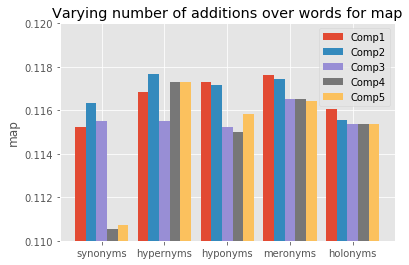

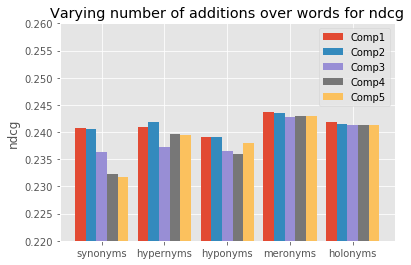

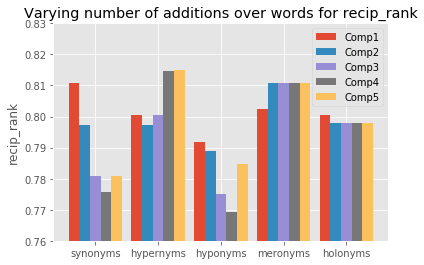

In [31]:
def compare_values(b,c,m):
    base = "C:/Users/Loes/Documents/M1/IR/git4dec/runs/" + b
    comp = "C:/Users/Loes/Documents/M1/IR/git4dec/runs/" + c
    qrels = "C:/Users/Loes/Documents/M1/IR/anserini/src/main/resources/topics-and-qrels/qrels.dl19-doc.txt"
    metric = m
    msmarco = False
    ymin = -1
    ymax = 1

    if msmarco:
        base_all, base_metrics = compute_metrics_from_files(qrels, base, per_query_score=True) 
        comp_all, comp_metrics = compute_metrics_from_files(qrels, comp, per_query_score=True) 
    else:
        os.system(f'C:/Users/Loes/Documents/M1/IR/git4dec/trec_eval -q -M1000 -m {metric} {qrels} {base} > eval.base')
        os.system(f'C:/Users/Loes/Documents/M1/IR/git4dec/trec_eval -q -M1000 -m {metric} {qrels} {comp} > eval.comp')
        
    base_metrics = load_metrics('eval.base')
    comp_metrics = load_metrics('eval.comp')
    
    if "." in metric:
        metric = "_".join(metric.split("."))

    if msmarco:
        metric = "MRR@10"
    keys = []
    for key in base_metrics[metric]:
        base_score = base_metrics[metric][key]
        if key not in comp_metrics[metric]:
            continue
        keys.append(key)

    # Extract the paired scores
    a = [base_metrics[metric][k] for k in keys]
    b = [comp_metrics[metric][k] for k in keys]

    (tstat, pvalue) = scipy.stats.ttest_rel(a, b)
    w, p = wilcoxon(a,b)
    base_mean = np.mean(a)
    comp_mean = np.mean(b)
    t_pval = pvalue
    w_pval = p
#     print(f'base mean: {np.mean(a):.4}')
#     print(f'comp mean: {np.mean(b):.4}')
#     print(f't-statistic: {tstat:.6}, p-value: {pvalue:.6}')
#     print(f'wilcoxon: w: {w}, p: {p:.6}')
    return comp_mean, t_pval, w_pval

numbers = [1,2,3,5]
words = ["synonyms", "hypernyms", "hyponyms", "meronyms", "holonyms"]
w = "synonyms"

def make_plott(n,metric):   
    comp_means = []
    t_pvals = []
    w_pvals = []
    for w in words:
        comp_mean, t_pval, w_pval = compare_values("bm25.txt","wordnet_"+w+str(n)+".txt",metric)
        comp_means.append(comp_mean)
        t_pvals.append(t_pval)
        w_pvals.append(w_pval)
    return comp_means, t_pvals, w_pvals

def metric_plot(metric,bot,top):
    comp_means1, t_pvals1, w_pvals1 = make_plott(1,metric)
    comp_means2, t_pvals2, w_pvals2 = make_plott(2,metric)
    comp_means3, t_pvals3, w_pvals3 = make_plott(3,metric)
    comp_means4, t_pvals4, w_pvals4 = make_plott(4,metric)
    comp_means5, t_pvals5, w_pvals5 = make_plott(5,metric)

    labels = ["synonyms", "hypernyms", "hyponyms", "meronyms", "holonyms"]
    
    highest = []
    words2 = []
    for w in range(len(labels)):
        temp = [comp_means1[w],comp_means2[w],comp_means3[w],comp_means4[w],comp_means5[w]]
        highi = np.argmax(temp)
        st = labels[w] + str(highi+1)
        words2.append(st)
        highest.append(temp[highi])
    
    outcome = metric + ": " + str(words2)
    print(outcome)

    x = np.arange(len(labels))  # the label locations
    width = 0.17  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 2*width, comp_means1, width, label='Comp1')
    rects2 = ax.bar(x - width, comp_means2, width, label='Comp2')
    rects3 = ax.bar(x, comp_means3, width, label='Comp3')
    rects4 = ax.bar(x + width, comp_means4, width, label='Comp4')
    rects5 = ax.bar(x + 2*width, comp_means5, width, label='Comp5')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(metric)
    title = "Varying number of additions over words for " + metric
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.set_ylim(bot,top)
    
metric_plot("map",0.11,0.12)
metric_plot("ndcg",0.22,0.26)
metric_plot("recip_rank",0.76,0.83)

###################
#MAP
# comp_means1, t_pvals1, w_pvals1 = make_plott(1,"P.10")
# comp_means2, t_pvals2, w_pvals2 = make_plott(2,"P.10")
# comp_means3, t_pvals3, w_pvals3 = make_plott(3,"P.10")
# comp_means5, t_pvals5, w_pvals5 = make_plott(5,"P.10")

# #plot [1,2,3,5]
# plt.bar(words,comp_means1,color='blue')
# plt.bar(words,comp_means2,color='green')
# plt.bar(words,comp_means3,color='yellow')
# plt.bar(words,comp_means5,color='red')
# plt.ylabel('P.10')
# plt.title("varying number of additions over words")
# plt.show()

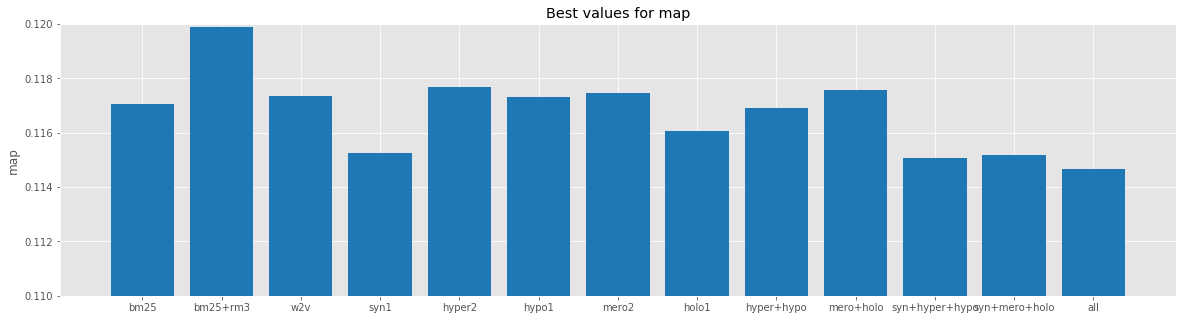

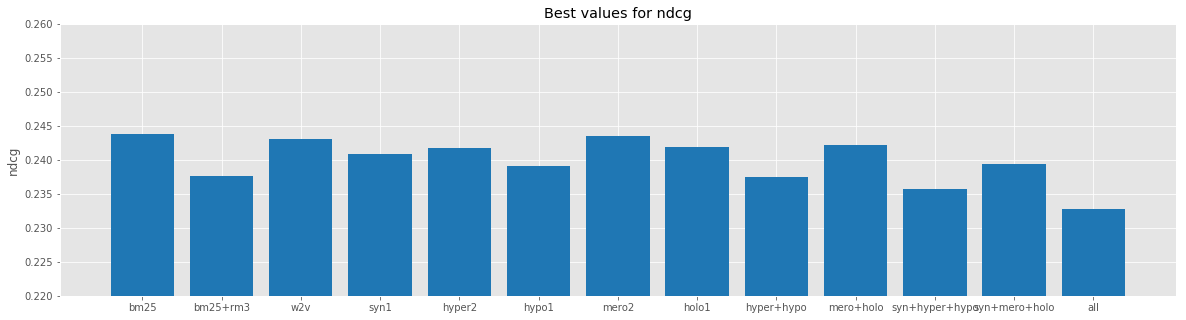

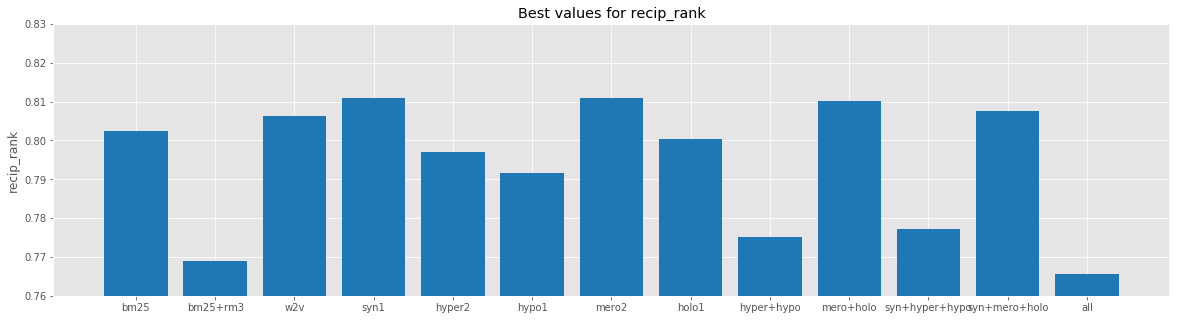

In [52]:
#highest singles
def comps(metric,bot,top):
    highest = []
    tests = ["bm25","bm25+rm3","word2vec"]
    tests.extend(["wordnet_synonyms1","wordnet_hypernyms2","wordnet_hyponyms1","wordnet_meronyms2","wordnet_holonyms1"])
    tests.extend(["wordnet_hyper+hypo","wordnet_mero+holo","wordnet_syn+hyper+hypo","wordnet_syn+mero+holo","wordnet_all"])
    
    for x in tests:
        value = compare_values("bm25.txt",x+".txt",metric)[0]
        highest.append(value)
    
    labels = ["bm25","bm25+rm3","w2v","syn1","hyper2","hypo1","mero2","holo1","hyper+hypo","mero+holo","syn+hyper+hypo","syn+mero+holo","all"]

    plt.figure(figsize=(20,5))
    plt.bar(labels,highest,color="tab:blue")
    plt.ylabel(metric)
    title = "Best values for " + metric
    plt.title(title)
    plt.ylim(bot,top)
    plt.show()
    
comps("map",0.11,0.12)
comps("ndcg",0.22,0.26)
comps("recip_rank",0.76,0.83)